# DATA100 FINAL PROJECT
# PHILIPPINE DENGUE CASES 2016-2020
<a id='PHILIPPINE DENGUE CASES'></a>
Submitted by: `Group 2`

Members:
1. Coronado, Calvin
2. Fausto, Lorane Bernadeth
3. Leonida, Dani
4. Li, Julian
5. Maronilla, Mary Avelyn
6. Ong, Elyssia

This notebook is an exploratory data analysis on the [Philippine Dengue Cases Dataset](https://www.kaggle.com/datasets/vincentgupo/dengue-cases-in-the-philippines). The dataset will be explained, cleaned, and explored by the end of this notebook.

| **`Table of Contents`** |
| --- |
| [The Dataset](#the-dataset) |
| [Reading the Dataset](#reading-the-dataset) |
| [Preliminary Exploratory Data Analysis](#preliminary-exploratory-data-analysis) |
| [Cleaning the Dataset](#cleaning-the-dataset) |
| [Exploratory Data Analysis](#Exploratory-data-analysis) |
| - [Question 1](#question-1) |
| [Feature Extraction](#feature-extraction) |
| [Data Visualization & Analysis](#data-visualization-&-analysis) |
| [Conclusion](#conclusion) |
| [References](#references) |

## The Dataset

-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

`Dengue` is a vector-borne disease that is transmitted by Aedes aegypti and Aedes albopictus mosquitoes. It is a disease that is endemic in 100 countries, one of them being the Philippines (Department of Health [DOH], n.d.). In 2019, the country recorded one of the highest number of cases in the world, amounting to 437,563 cases. Although the country has established the National Dengue Prevention and Control Program in 1993 to address the long-standing issue with the disease, it is still having issues with managing and reducing the number of cases every year (Ong et al., 2022).

`Philippines Dengue Cases 2016-2020` is a collection of the monthly and regional dengue cases in the Philippines from 2016 to 2020. The dataset came from the publicly available data from the Department of Health in the Philippines. *describe dataset here. Include where it came from and how it is compiled. Include limitations if there are.*

The dataset is provided as a `.csv` file where it can be viewed in Excel and Notepad. 

This dataset contains 1020 **observations** across 5 **variables**. Each row represents **1 month per year**, while columns represent **dengue cases information**. The following are the variables in the dataset and their descriptions:

| Variable Name | Description |
| --- | --- |
| **`Month`** | Month of the year in text format |
| **`Year`** | Ranges from 2016-2020 in numerical format |
| **`Region`** | Region in the Philippines |
| **`Dengue_Cases`** | Number of Monthly Cases per region (including deaths) |
| **`Dengue_Deaths`** | Number of Monthly Deaths per region due to dengue |

## Importing Libraries
For this notebook, **numpy**, **pandas**, and **matplotlib** must be imported.

*describe sns, matplotlib inline*

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import f_oneway
import statistics

%matplotlib inline

## Reading the Dataset
-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

Here we will load the dataset using pandas. This will load the dataset into a pandas `DataFrame`. We use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to load the dataset. The path will have to be changed depending on the location of the file in your machine.


In [2]:
cases_df = pd.read_csv('ph_dengue_cases2016-2020.csv')

The dataset is now loaded in the `cases_df` variable. `cases_df` is a [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). It is a data structure for storing tabular data, and the main data structure used in pandas.

The next cell show the contents of the `DataFrame`.

In [3]:
cases_df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


Display the dataset info using the [`info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function.

In [4]:
cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


## Preliminary Exploratory Data Analysis

-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

*Describe your data. You can point anomalies/outliers in the data.*

*include shape() and describe()*

In [5]:
cases_df.shape

(1020, 5)

In [7]:
cases_df.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [10]:
#checking for outliers for dengue cases
fig = px.box(cases_df, y="Dengue_Cases")
fig.show()

In [11]:
#checking for outliers for dengue deaths
fig = px.box(cases_df, y="Dengue_Deaths")
fig.show()

### Intial Observations
- There are a total of x rows and x columns
- There are, on average, x number of dengue cases in the Philippines
- There are, on average, x number of dengue deaths in the Philippines

## Cleaning the Dataset

-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

*Explain why the data was preprocessed that way. If you removed data, explain why removing the data was necessary*

Before we can begin exploring the data, we must first clean the dataset. This is to prevent inconsistencies that may cause problems or errors during analysis.

We then check if there are any duplicated data in the dataset. We do this by calling the [duplicated](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. The function checks and returns the duplicated values.

In [18]:
duplicated = cases_df[cases_df.duplicated()]
dupes = str(duplicated.shape)

print("Number of duplicates: "  + dupes[1 : (dupes.find(','))])

Number of duplicates: 0


As displayed above there are **``0 duplicates``** in the dataset. If there are duplicates, these can be simply removed by calling the [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) function.

Next, we check if each columns has **NaN or Null** values.

In [19]:
cases_df.isnull().any()

Month            False
Year             False
Region           False
Dengue_Cases     False
Dengue_Deaths    False
dtype: bool

From the results above, it can be seen that there are **no NaN or Null Values** in the dataset.

### to edit
Since there are no null values, the only columns needed to be cleaned are:
- `Region`

In [20]:
old_labels = np.sort(cases_df['Region'].unique())

some region names are too long, so we removed the word "region" in some names. the next cell shows the new region names

In [21]:
new_labels = ['BARMM',
              'CAR',
              'NCR',
              'I',
              'II',
              'III',
              'IV-A',
              'IV-B',
              'IX',
              'V',
              'VI',
              'VII',
              'VIII',
              'X',
              'XI',
              'XII',
              'XIII']

compare = "\n".join("{:30} {}".format(x, y) for x, y in zip(old_labels, new_labels))
print(compare)

BARMM                          BARMM
CAR                            CAR
NCR                            NCR
Region I                       I
Region II                      II
Region III                     III
Region IV-A                    IV-A
Region IV-B                    IV-B
Region IX                      IX
Region V                       V
Region VI                      VI
Region VII                     VII
Region VIII                    VIII
Region X                       X
Region XI                      XI
Region XII                     XII
Region XIII                    XIII


In [22]:
# to replace old labels with new labels
cases_df['Region'] = cases_df['Region'].replace(old_labels, new_labels)
cases_df['Region'].value_counts()

I        60
IX       60
CAR      60
NCR      60
XIII     60
XII      60
XI       60
X        60
VIII     60
II       60
VII      60
VI       60
V        60
IV-B     60
IV-A     60
III      60
BARMM    60
Name: Region, dtype: int64

Now that we have cleaned all columns that will be used for this notebook. We can now begin the [Exploratory Data Analysis](#exploratory-data-analysis).

## Exploratory Data Analysis

-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

*What kind of initial features you are dealing with? Discuss patterns or findings.*

*include at least 5 EDA questions to form research question*

### Question 1: How have the number of Dengue cases changed over 2016 to 2020

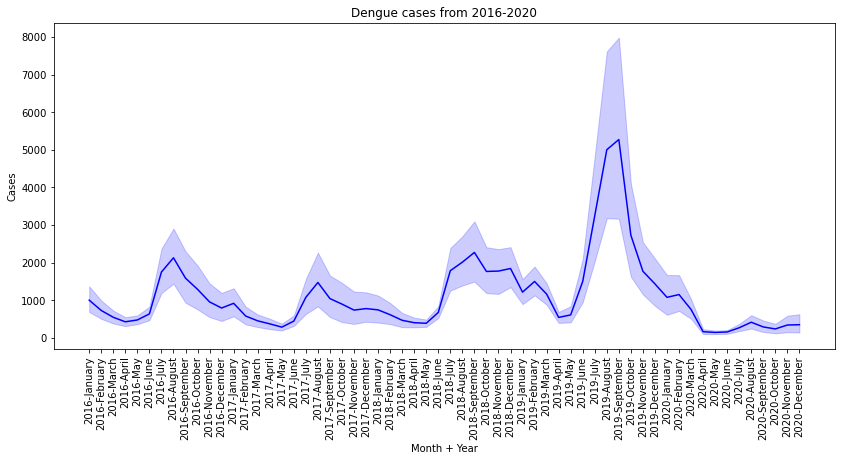

In [13]:
index = 0
date = []
years = [i for i in cases_df.Year]

for i in cases_df.Month:
    date.append(str(years[index])+'-'+str(i))
    index += 1

plt.figure(figsize=(14,6))
sns.lineplot(x=date,y=[i for i in cases_df['Dengue_Cases']],color='blue')
plt.title(label='Dengue cases from 2016-2020')
plt.xlabel(xlabel='Month + Year')
plt.ylabel(ylabel='Number of Cases')
plt.xticks(rotation=90)
plt.show()

### Question 1 Results

*explain what you learned from the results*

### Question 2: Are the any significant differences between 2016 to 2020

In [14]:
cleanDF = cases_df
regionCases2016 = []
regionCases2017 = []
regionCases2018 = []
regionCases2019 = []
regionCases2020 = []

#separate the data per year
tempDF2016 = cleanDF.query("Year == 2016")
tempDF2017 = cleanDF.query("Year == 2017")
tempDF2018 = cleanDF.query("Year == 2018")
tempDF2019 = cleanDF.query("Year == 2019")
tempDF2020 = cleanDF.query("Year == 2020")

In [15]:
#get all cases per region on 2016
for i in np.unique(tempDF2016['Region']):
    tempDF2 = tempDF2016.query("Region == '{}'".format(i))
    regionCases2016.append([sum([i for i in tempDF2['Dengue_Cases']]),i])

#get all cases per region on 2017
for i in np.unique(tempDF2017['Region']):
    tempDF2 = tempDF2017.query("Region == '{}'".format(i))
    regionCases2017.append([sum([i for i in tempDF2['Dengue_Cases']]),i])

#get all cases per region on 2018
for i in np.unique(tempDF2018['Region']):
    tempDF2 = tempDF2018.query("Region == '{}'".format(i))
    regionCases2018.append([sum([i for i in tempDF2['Dengue_Cases']]),i])

#get all cases per region on 2019
for i in np.unique(tempDF2019['Region']):
    tempDF2 = tempDF2019.query("Region == '{}'".format(i))
    regionCases2019.append([sum([i for i in tempDF2['Dengue_Cases']]),i])

#get all cases per region on 2020
for i in np.unique(tempDF2020['Region']):
    tempDF2 = tempDF2020.query("Region == '{}'".format(i))
    regionCases2020.append([sum([i for i in tempDF2['Dengue_Cases']]),i])

In [26]:
mean2016 = []
mean2017 = []
mean2018 = []
mean2019 = []
mean2020 = []

#Gather all number of cases into a single list
for i in range(len(new_labels)):
  mean2016.append(regionCases2016[i][0])
  mean2017.append(regionCases2017[i][0])
  mean2018.append(regionCases2018[i][0])
  mean2019.append(regionCases2019[i][0])
  mean2020.append(regionCases2020[i][0])

#mean and variance cases per year
print("Mean Cases per Year")
print("2016 - ", sum(mean2016) / len(regionCases2016))
print("2017 - ", sum(mean2017) / len(regionCases2017))
print("2018 - ", sum(mean2018) / len(regionCases2018))
print("2019 - ", sum(mean2019) / len(regionCases2019))
print("2020 - ", sum(mean2020) / len(regionCases2020))

print()

print("Variance per Year")
print("2016 - ", statistics.variance(mean2016))
print("2017 - ", statistics.variance(mean2017))
print("2018 - ", statistics.variance(mean2018))
print("2019 - ", statistics.variance(mean2019))
print("2020 - ", statistics.variance(mean2020))

Mean Cases per Year
2016 -  12326.117647058823
2017 -  9067.941176470587
2018 -  14751.941176470587
2019 -  25994.235294117647
2020 -  5355.35294117647

Variance per Year
2016 -  75601384.6102941
2017 -  67824475.80882353
2018 -  92672648.93382353
2019 -  368154444.9411765
2020 -  17372712.49264706


In [27]:
#one-way ANOVA
f_oneway(mean2016, mean2017, mean2018, mean2019, mean2020)

F_onewayResult(statistic=8.376232153844162, pvalue=1.072682940880419e-05)

### Question 2 Results

*explain what you learned from the results*

# Feature Extraction

-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

After much deliberation and preparation of the given dataset, it is deemed that no additional features are necessary for further analysis, nor would it be advised to extract new features. With that said, we will proceed with the Data Visualization and Analysis portion as intended.

# Data Visualization & Analysis

-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

*Explain what the chart shows and what insights can be seen from it*

# Conclusion

-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

*Summary of findings and your recommendations*

# References

-- [Return to Table of Contents](#DATA100-FINAL-PROJECT) --

*You are encouraged to look at existing solutions online and learn from them (please cite)*